   Vaccin  HndWshQual  HndWshFreq  SocialDist  NotTchFace  RespEtiq  \
0     3.0         4.0         4.0         2.0         1.0       5.0   
1     2.0         4.0         4.0         5.0         2.0       5.0   
2     3.0         2.0         2.0         2.0         3.0       2.0   
3     3.0         3.0         2.0         2.0         2.0       5.0   
4     2.0         5.0         3.0         3.0         2.0       5.0   

   PrsnlDist  Sick  
0        1.0   0.0  
1        4.0   1.0  
2        2.0   0.0  
3        3.0   2.0  
4        5.0   1.0  
1.0
5.0
1.0
5.0
2


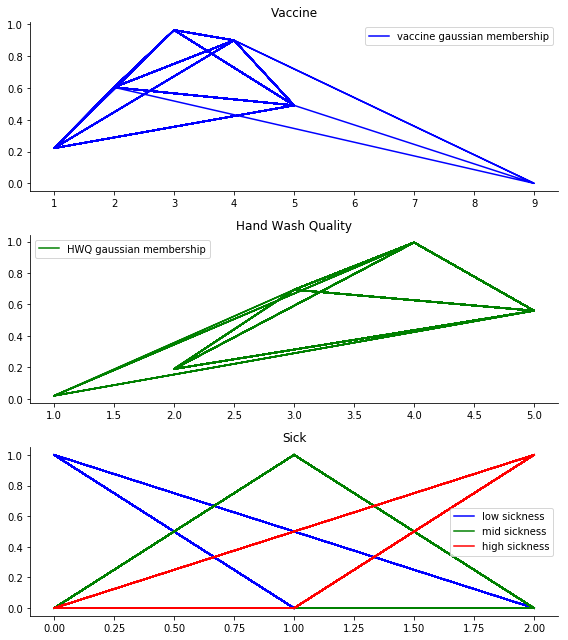

In [3]:
import skfuzzy as fuzzy
import pandas as pd
import numpy as np
# visualizing the membership functions
from matplotlib import pyplot as plt
import math

df = pd.read_csv('../Data/fluML.csv')
working_frame = df.iloc[:,1:8].copy(deep=True)
working_frame['Sick'] = df.iloc[:,15].copy(deep=True)
print working_frame.head()
print min(working_frame.SocialDist)
print max(working_frame.SocialDist)
print min(working_frame.HndWshQual)
print max(working_frame.HndWshQual)
print len(working_frame[working_frame['Vaccin'] == 9.0].values)

x_vacc = working_frame.Vaccin
x_hwq = working_frame.HndWshQual
#x_hwf = working_frame.HndWshFreq
#x_sd = working_frame.SocialDist
#x_ntf = working_frame.NotTchFace
#x_re = working_frame.RespEtiq
#x_pd = working_frame.PrsnlDist
x_sick = working_frame.Sick



# Feature: Vaccine
#xvlo = [1,2,3,4,5]
#xvmd = [3,4,5,6,7]
#xvhi = [5,6,7,8,9]
x_vacc_mf_val = fuzzy.gaussmf(x_vacc,np.mean(x_vacc), np.std(x_vacc))
#x_vacc_md = fuzzy.gaussmf(xvmd,np.mean(xvmd), np.std(xvmd))
#x_vacc_hi = fuzzy.gaussmf(xvhi,np.mean(xvhi), np.std(xvhi))
#print "lo", ":", x_vacc_lo
#print "md", ":", x_vacc_md
#print "hi", ":", x_vacc_hi

# Feature: Hand Wash Quality 
#xhwqlo = [1,2,3]
#xhwqmd = [2,3,4]
#xhwqhi = [3,4,5]
x_hwq_mf_val = fuzzy.gaussmf(x_hwq, np.mean(x_hwq), np.std(x_hwq))
#x_hwq_md = fuzzy.gaussmf(xhwqmd, np.mean(xhwqmd), np.std(xhwqmd))
#x_hwq_hi = fuzzy.gaussmf(xhwqhi, np.mean(xhwqhi), np.std(xhwqhi))

# Feature: Sick (target variable)
x_sick_lo = fuzzy.trimf(x_sick, [0,0,1])
x_sick_md = fuzzy.trimf(x_sick, [0,1,2])
x_sick_hi = fuzzy.trimf(x_sick, [1,2,2])



fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))
ax0.plot(x_vacc, x_vacc_mf_val, 'b', linewidth=1.5, label='vaccine gaussian membership')
#ax0.plot(xvmd, x_vacc_md, 'g', linewidth=1.5, label='mid vaccine')
#ax0.plot(xvhi, x_vacc_hi, 'r', linewidth=1.5, label='high vaccine')
ax0.set_title('Vaccine')
ax0.legend()

ax1.plot(x_hwq, x_hwq_mf_val, 'g', linewidth=1.5, label='HWQ gaussian membership')
#ax1.plot(xhwqmd, x_hwq_md, 'g', linewidth=1.5, label='mid HWQ')
#ax1.plot(xhwqhi, x_hwq_hi, 'r', linewidth=1.5, label='high HWQ')
ax1.set_title('Hand Wash Quality')
ax1.legend()

ax2.plot(x_sick, x_sick_lo, 'b', linewidth=1.5, label='low sickness')
ax2.plot(x_sick, x_sick_md, 'g', linewidth=1.5, label='mid sickness')
ax2.plot(x_sick, x_sick_hi, 'r', linewidth=1.5, label='high sickness')
ax2.set_title('Sick')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

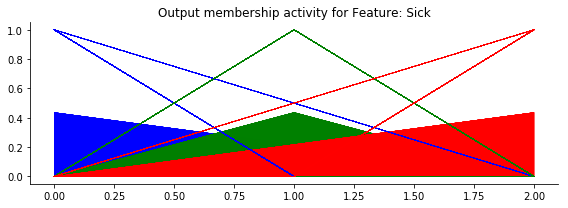

In [2]:
vacc_mf = fuzzy.interp_membership(x_vacc, x_vacc_mf_val, 3)
#vacc_md = fuzzy.interp_membership(xvmd, x_vacc_md, 3)
#vacc_hi = fuzzy.interp_membership(xvhi, x_vacc_hi, 3)

hwq_mf = fuzzy.interp_membership(x_hwq, x_hwq_mf_val, 4)
#hwq_md = fuzzy.interp_membership(xhwqmd, x_hwq_md, 4)
#hwq_hi = fuzzy.interp_membership(xhwqhi, x_hwq_hi, 4)

rule_gaussmf = np.fmax(vacc_mf, hwq_mf)
sick_activn_lo = np.fmin(rule_gaussmf, x_sick_lo)
#rule_md = np.fmax(vacc_md, hwq_md)
sick_activn_md = np.fmin(rule_gaussmf, x_sick_md)
#rule_hi = np.fmax(vacc_hi, hwq_hi)
sick_activn_hi = np.fmin(rule_gaussmf, x_sick_hi)

sick0 = np.zeros_like(x_sick)

#visualization
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.fill_between(x_sick, sick0, sick_activn_lo, facecolor='b', alpha=0.7)
ax0.plot(x_sick,x_sick_lo, 'b', linewidth=0.5, linestyle='--')

ax0.fill_between(x_sick, sick0, sick_activn_md, facecolor='g', alpha=0.7)
ax0.plot(x_sick,x_sick_md, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_sick, sick0, sick_activn_hi, facecolor='r', alpha=0.7)
ax0.plot(x_sick,x_sick_hi, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity for Feature: Sick')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [3]:
def defuzz(x, mfx):
    sum_moment_area = 0; sum_area=0
    if len(x) == 1:
        return x[0]*mfx[0] / np.fmax(mfx[0], np.finfo(float).eps).astype(float)
    
    # else return the sum of moment*area/sum of area
    for i in range(1, len(x)):
        x1 = x[i - 1]
        #print x1
        x2 = x[i]
        #print x2
        y1 = mfx[i - 1]
        #print y1
        y2 = mfx[i]
        #print y2
        
        # if y1 == y2 == 0.0 or x1==x2: --> rectangle of zero height or width
        if not(y1 == y2 == 0.0 or x1 == x2):
            if y1 == y2:  # rectangle
                moment = 0.5 * (x1 + x2)
                area = (x2 - x1) * y1
            elif y1 == 0.0 and y2 != 0.0:  # triangle, height y2
                moment = 2.0 / 3.0 * (x2-x1) + x1
                area = 0.5 * (x2 - x1) * y2
            elif y2 == 0.0 and y1 != 0.0:  # triangle, height y1
                moment = 1.0 / 3.0 * (x2 - x1) + x1
                area = 0.5 * (x2 - x1) * y1
            else:
                moment = (2.0 / 3.0 * (x2-x1) * (y2 + 0.5*y1)) / (y1+y2) + x1
                area = 0.5 * (x2 - x1) * (y1 + y2)
            if math.isnan(area) or math.isnan(moment):
                continue
            sum_moment_area += moment * area
            sum_area += area
    print "SMA", abs(sum_moment_area)
    print "SA", abs(sum_area)
    return sum_moment_area / np.fmax(sum_area, np.finfo(float).eps).astype(float)

SMA 0.218518697584
SA 1.3111121855
0.166666666667
0.437037395168


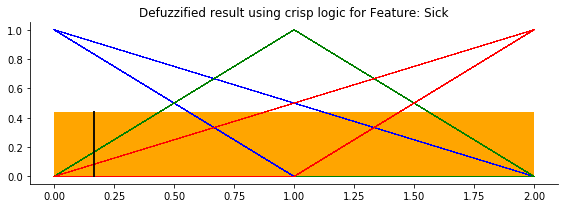

In [4]:
# Defuzzification using the centroid method
#visualization

aggregation_of_3_membership = np.fmax(sick_activn_lo, np.fmax(sick_activn_md, sick_activn_hi))
#print aggregation_of_3_membership
sickness_score = defuzz(x_sick, aggregation_of_3_membership) # it is made for only centroid
sickness_score = abs(sickness_score)
print sickness_score
sickness_membership_score = fuzzy.interp_membership(x_sick, aggregation_of_3_membership, sickness_score)
sickness_membership_score  = abs(sickness_membership_score)
print sickness_membership_score
fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(x_sick,x_sick_lo, 'b', linewidth=0.5, linestyle='--')

ax0.plot(x_sick,x_sick_md, 'g', linewidth=0.5, linestyle='--')

ax0.plot(x_sick,x_sick_hi, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_sick, sick0, aggregation_of_3_membership, facecolor='Orange', alpha=0.7)
ax0.plot([sickness_score, sickness_score],[0,sickness_membership_score],'k', linewidth=2.0, alpha=0.9)
ax0.set_title('Defuzzified result using crisp logic for Feature: Sick')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [15]:
temp = list(working_frame[(working_frame['Vaccin'] == 9) & (working_frame['HndWshQual'] ==4)]['Sick'])
print temp.count(0)
print temp.count(1)
print temp.count(2)

1
0
0


In [16]:
#### 3 4 1
#### 4 4 1
#### 5 5 1 
#### 7 2 0

In [6]:
print range(1,6)

[1, 2, 3, 4, 5]


In [9]:
import skfuzzy as fuzzy
import pandas as pd
import numpy as np
# visualizing the membership functions
from matplotlib import pyplot as plt
import math

df = pd.read_csv('../Data/fluML.csv')
working_frame = df.iloc[:,1:8].copy(deep=True)
working_frame['Sick'] = df.iloc[:,15].copy(deep=True)

for i in range(0,6):
    print i, len(working_frame[working_frame['Sick'] == i].values)

0 83
1 213
2 78
3 0
4 0
5 0
